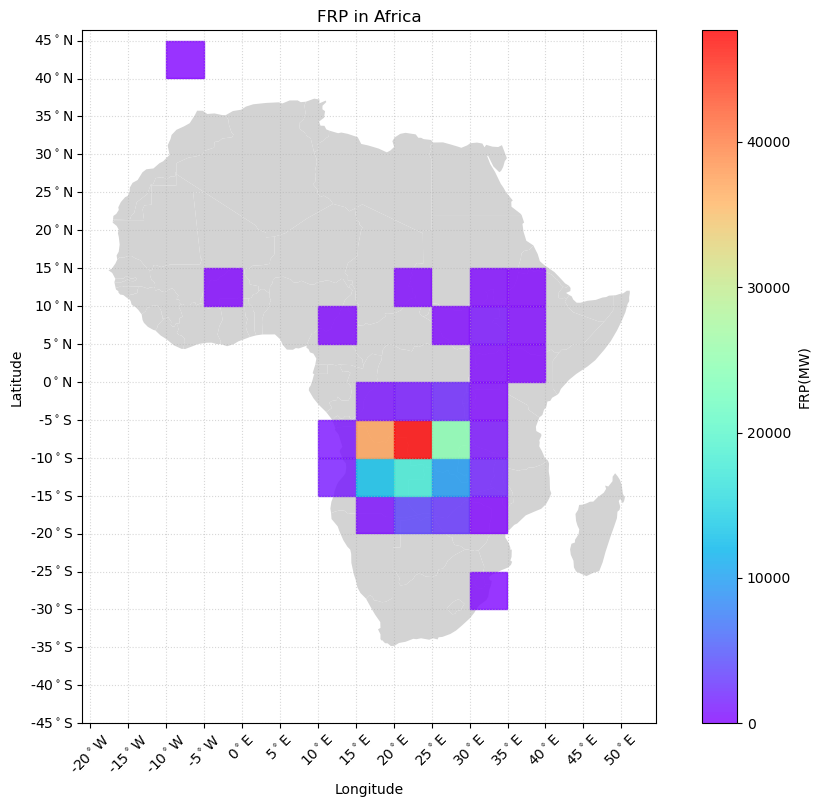

In [1]:
#--------------------------------Import Libraries needed-----------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os,sys

#--------------------------------End of Libraries---------------------------------------------


#--------------------------------Define Global Variables---------------------------------------------
#define working dir
curr_workdir = '/notebooks/KCL_test'

#define list product file dir
list_product_dir = '/data'
#list_product_dir = '/data_201606'

#define output file name
Grid_FRP_file = 'grid_FRP.csv'

PNG_file_name = 'KCL_test_HonggangWang.png'
#--------------------------------End of Global Variables---------------------------------------------


#-------------------------------------Define-Functions---------------------------------------------
def main():
    # Read the produced grid FRP data
    os.chdir(curr_workdir+list_product_dir)
    df = pd.read_csv(Grid_FRP_file, usecols=["Lon", "Lat", "FRP"])
    
    # initialize an axis
    fig, ax = plt.subplots(figsize=(12,9))

    # plot map on axis - Africa is our interested area as a bachground map
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    countries[countries["continent"].isin(["Africa"])].plot(color="lightgrey", ax=ax)

    # remove the zero FRP grid points
    df=df[df['FRP']>0.0]

    # plot the FRP values on the map - Use alpha to set the color transparent degree
    sm=ax.scatter(df.Lon, df.Lat, c=df.FRP,  cmap='rainbow', vmin=0, vmax=max(df['FRP']), marker=',', alpha=0.8, s=730)
    cb = plt.colorbar(sm) # get a colorbar object
    cb.set_label('FRP(MW)') #set the colorbar label

    #set the grid pattern 
    ax.grid(visible=True, alpha=0.5,linestyle=':')


    start_x = -20
    end_x = 50 + 1 # plus 1 to show the lable on the limits
    x_ticks= np.arange(start_x, end_x, 5)  #create x_ticks between start_x and end_x with interval of 5 degree
    ax.xaxis.set_ticks(x_ticks)
    
    #composite tick label based on the lon data so that it is more informative
    x_ticks_labels=[]
    for xt in x_ticks:
        if xt >= 0:
            tmp_xtl = str(xt)+'$^\circ$E'
        else:
            tmp_xtl = str(xt)+'$^\circ$W'    
        x_ticks_labels.append(tmp_xtl)
    
    ax.set_xticklabels(x_ticks_labels)

    start_y = -45
    end_y = 45 + 1
    y_ticks= np.arange(start_y, end_y, 5)
    ax.yaxis.set_ticks(y_ticks)
    y_ticks_labels=[]
    
    for yt in y_ticks:
        if yt >= 0:
            tmp_ytl = str(yt)+'$^\circ$N'
        else:
            tmp_ytl = str(yt)+'$^\circ$S'    
        y_ticks_labels.append(tmp_ytl)
    
    ax.set_yticklabels(y_ticks_labels)


    plt.title('FRP in Africa')
    plt.xticks(rotation=45)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.savefig(PNG_file_name)
    plt.show()
    
#-------------------------------------End of Functions---------------------------------------------




#-------------------------------------Running the main function--------------------------

if __name__ == "__main__":
    main()
    
#-------------------------------------End of the Program--------------------------------